In [2]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils_VBFHH as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import json
import copy
from ROOT import TLorentzVector
import uproot


Welcome to JupyROOT 6.18/00


In [3]:
def load_data_rpd(file_name, branches, process,treedir,selection='',entrystop=None,):

    root_file = uproot.open(file_name)
    df = rpd.read_root(file_name,treedir+process, columns = branches).query(selection)
    print("Entries in ntuple:")
    print(len(df))
    return df

In [32]:
year='2018'


indir = '/work/nchernya/HHbbgg_ETH_devel/root_files/gghh_2jets/'
indir2='/work/nchernya/HHbbgg_ETH_devel/root_files/vbfhh_preselection_wo_ttHkiller/'

file_ggHH_NLO = 'output_hh_nlo_kl_1_kt_1.root'
#file_ggHH_NLO = 'GluGluToHHTo2B2G_node_cHHH1_Era2018_RR-17Sep2018_v2.root'
file_ggHH_LO = 'GluGluToHHTo2B2G_Era2018_RR-17Sep2018_v2.root'

process_ggHH_NLO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_ggHH_LO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'

features = 'HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,noexpand:(leadingPhoton_pt/CMS_hgg_mass),noexpand:(subleadingPhoton_pt/CMS_hgg_mass),noexpand:(leadingJet_pt/Mjj),noexpand:(subleadingJet_pt/Mjj),rho,noexpand:(leadingJet_bRegNNResolution*1.4826),noexpand:(subleadingJet_bRegNNResolution*1.4826),noexpand:(sigmaMJets*1.4826),PhoJetMinDr,PhoJetOtherDr,noexpand:(VBFleadJet_pt/VBFJet_mjj),VBFleadJet_eta,noexpand:(VBFsubleadJet_pt/VBFJet_mjj),VBFsubleadJet_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFProd_eta,VBFJet_mjj,VBFJet_Delta_eta,VBFleadJet_QGL,VBFsubleadJet_QGL,diHiggs_pt,MX'.split(",")
out_dir = indir+'plots_ggHH_LOreweighting/'

df_ggHH_NLO = load_data_rpd(indir2+file_ggHH_NLO, features+['genweight'], process_ggHH_NLO,'tagsDumper/trees/','(genweight<0.1)') #and(HHbbggMVA>0.7)
features+=['benchmark_reweight_SM']
df_ggHH_LO = load_data_rpd(indir+file_ggHH_LO, features, process_ggHH_LO,'tagsDumper/trees/','(diHiggs_pt>0)') 

Entries in ntuple:
17219
Entries in ntuple:
482573


HHbbggMVA


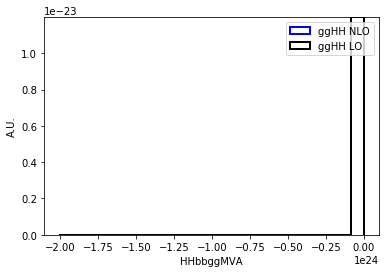

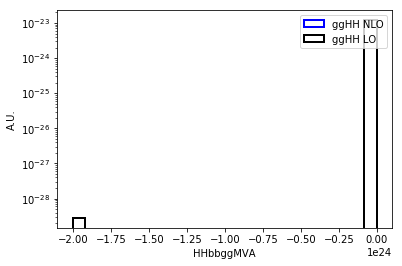

leadingJet_DeepFlavour


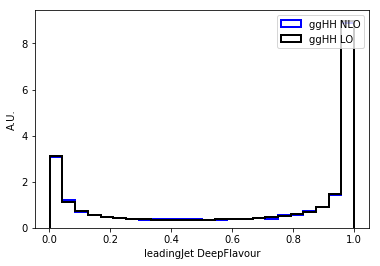

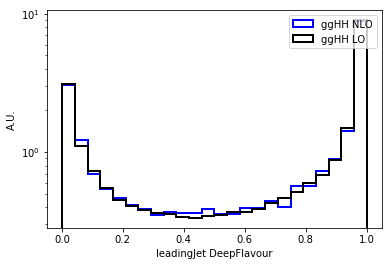

subleadingJet_DeepFlavour


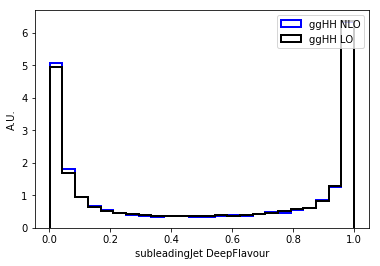

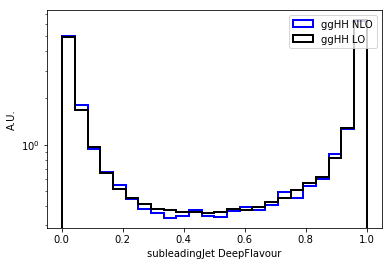

absCosThetaStar_CS


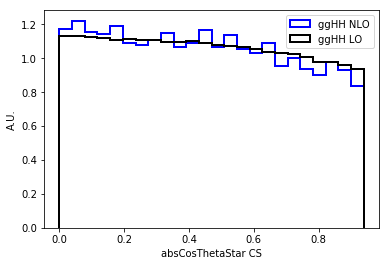

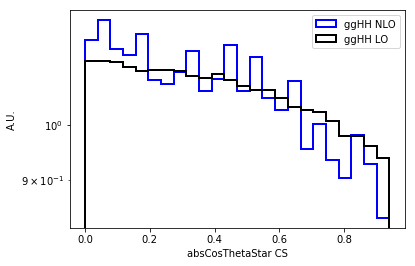

absCosTheta_bb


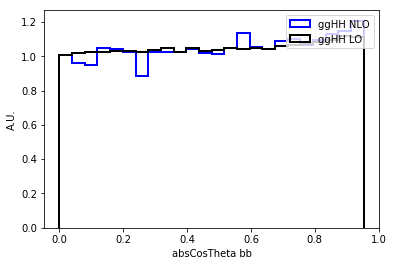

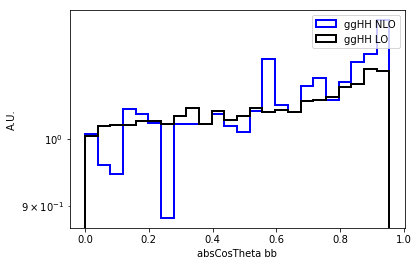

absCosTheta_gg


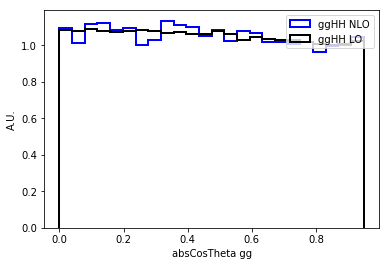

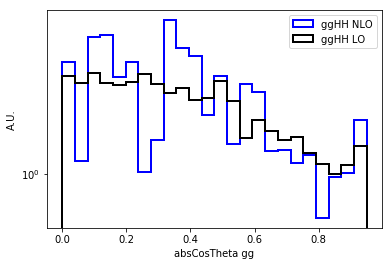

diphotonCandidatePtOverdiHiggsM


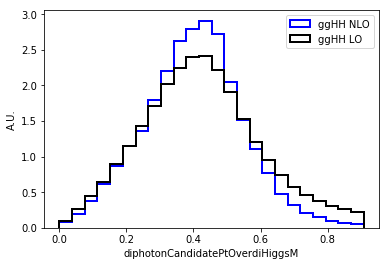

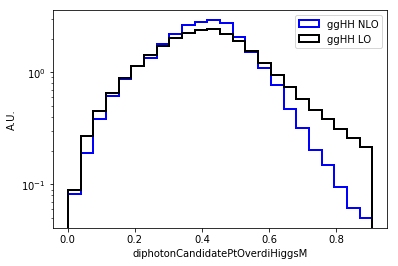

dijetCandidatePtOverdiHiggsM


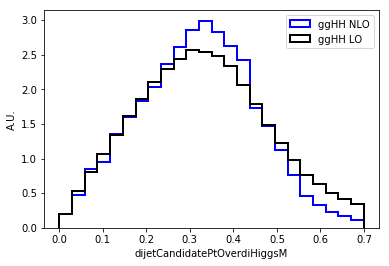

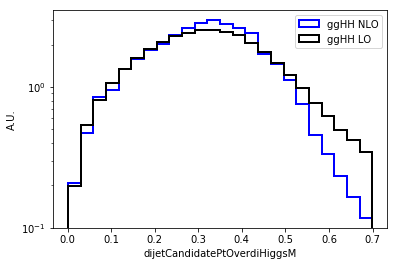

customLeadingPhotonIDMVA


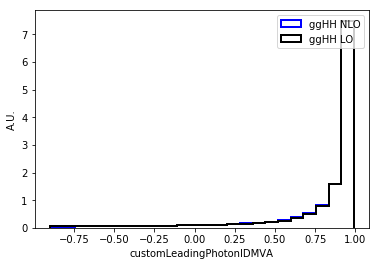

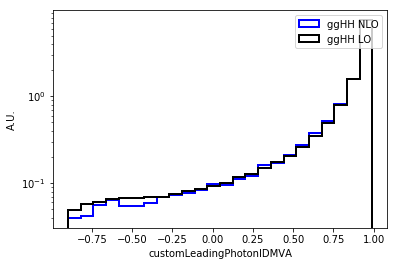

customSubLeadingPhotonIDMVA


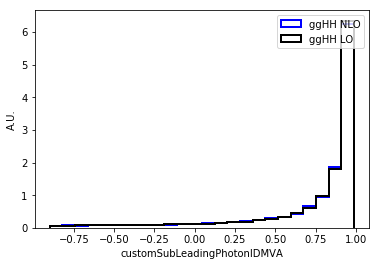

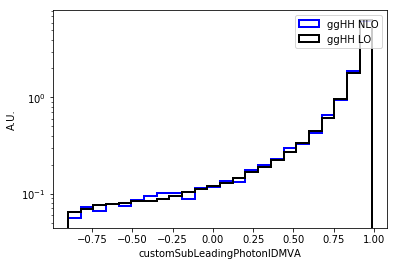

leadingPhotonSigOverE


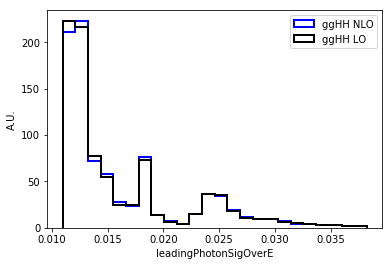

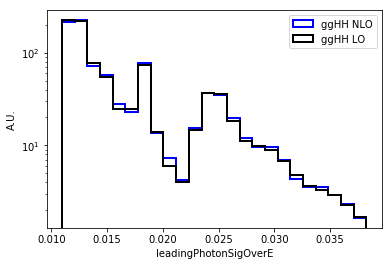

subleadingPhotonSigOverE


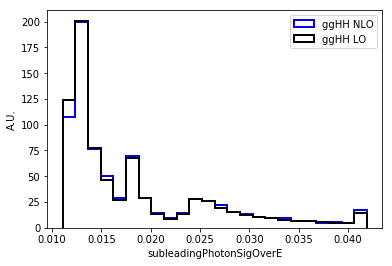

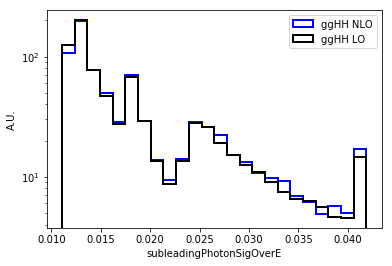

sigmaMOverM


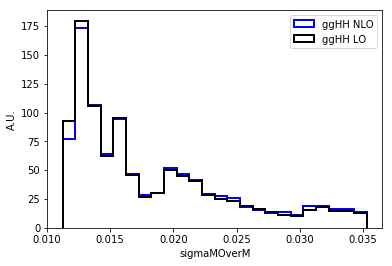

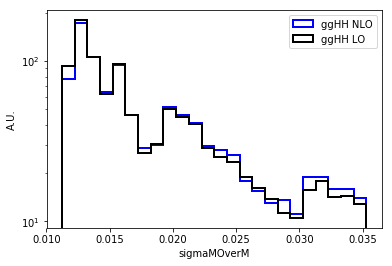

noexpand:(leadingPhoton_pt/CMS_hgg_mass)


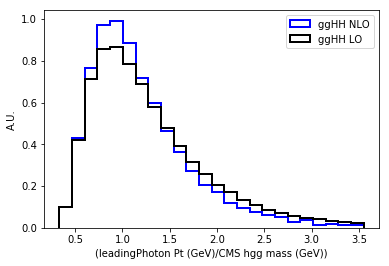

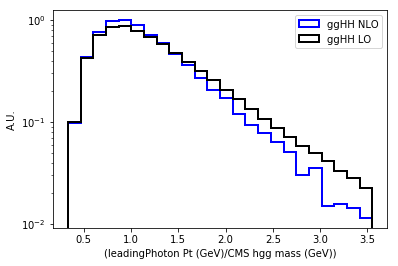

noexpand:(subleadingPhoton_pt/CMS_hgg_mass)


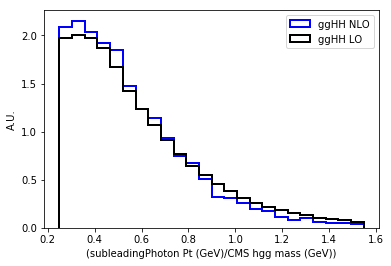

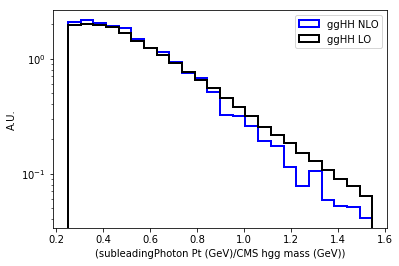

noexpand:(leadingJet_pt/Mjj)


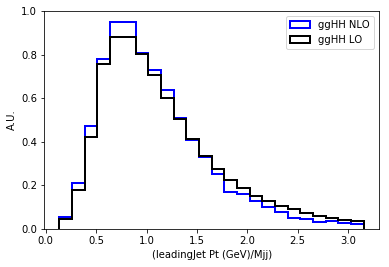

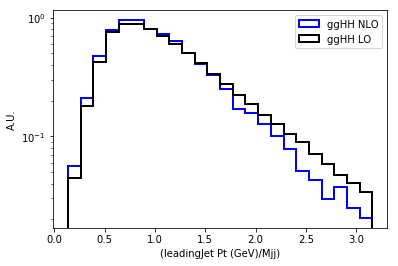

noexpand:(subleadingJet_pt/Mjj)


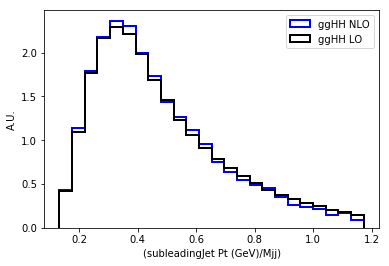

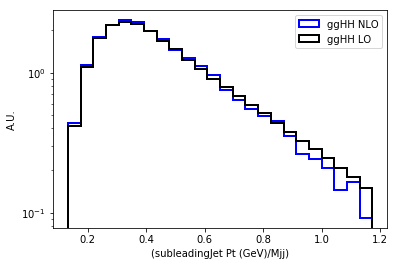

rho


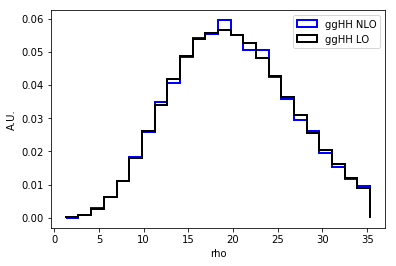

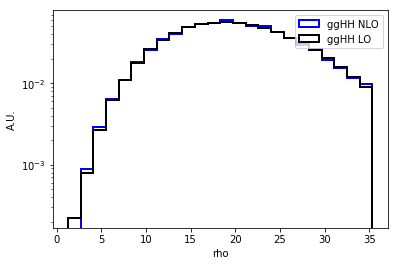

noexpand:(leadingJet_bRegNNResolution*1.4826)


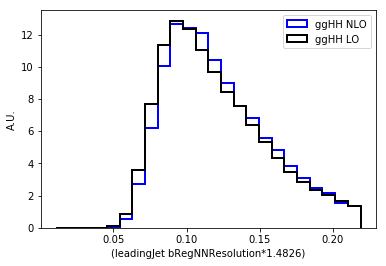

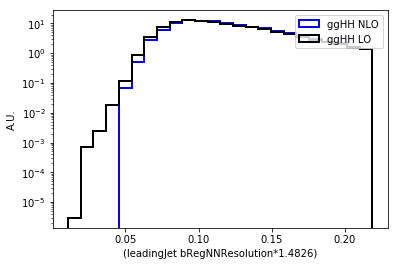

noexpand:(subleadingJet_bRegNNResolution*1.4826)


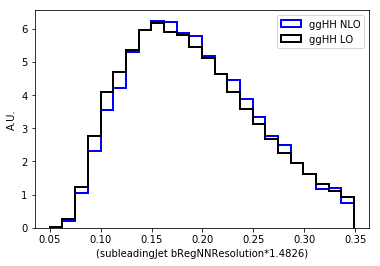

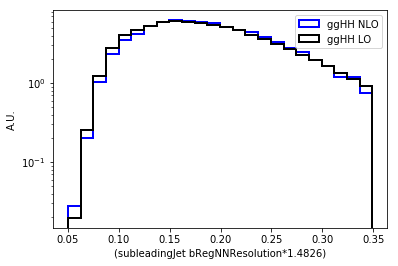

noexpand:(sigmaMJets*1.4826)


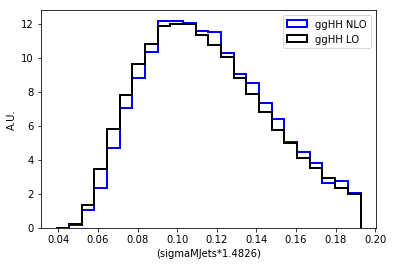

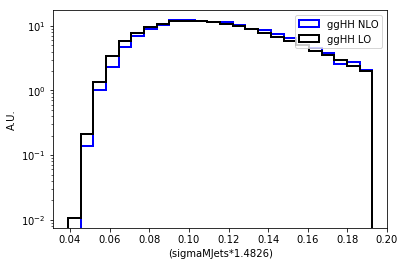

PhoJetMinDr


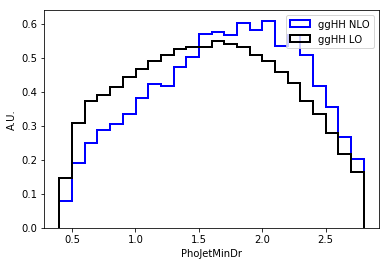

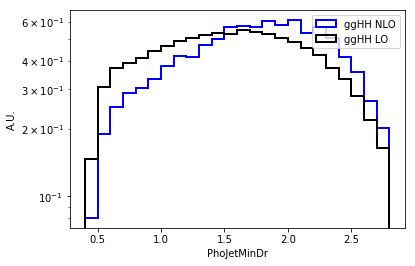

PhoJetOtherDr


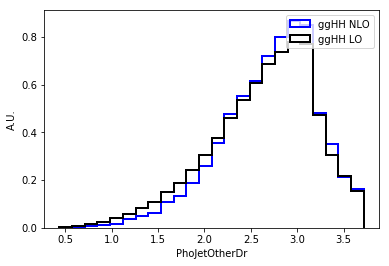

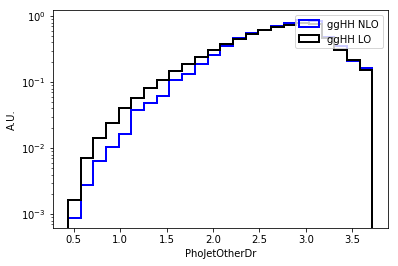

noexpand:(VBFleadJet_pt/VBFJet_mjj)


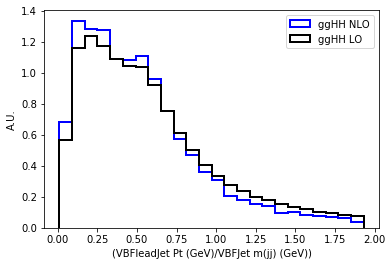

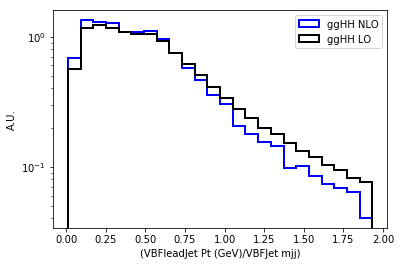

VBFleadJet_eta


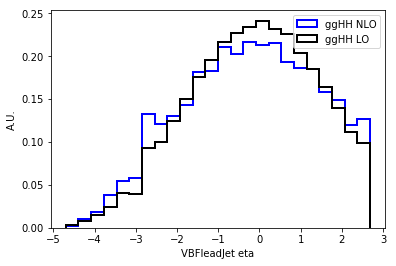

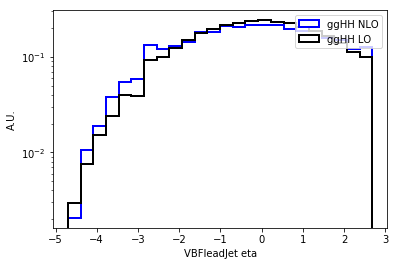

noexpand:(VBFsubleadJet_pt/VBFJet_mjj)


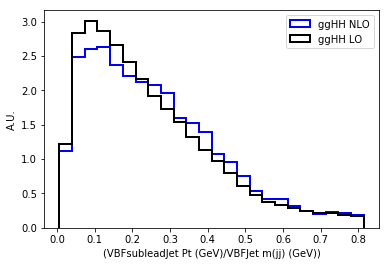

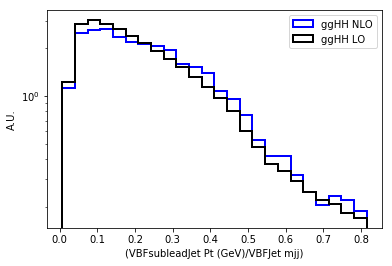

VBFsubleadJet_eta


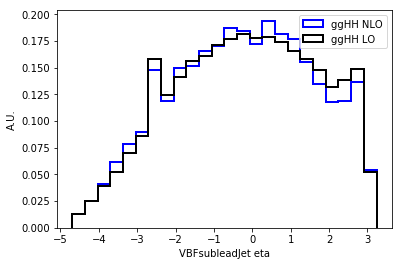

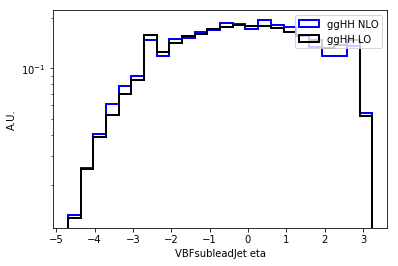

VBFCentrality_jg


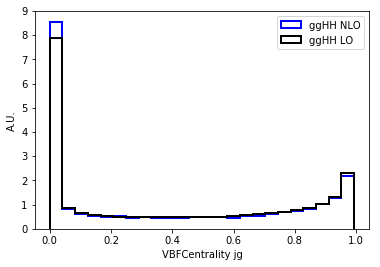

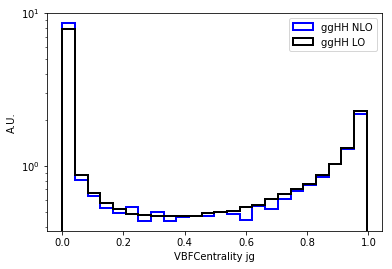

VBFCentrality_jb


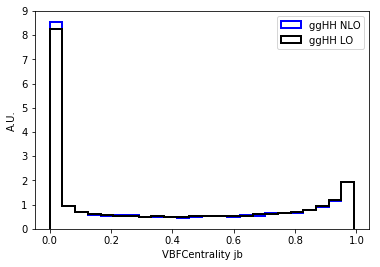

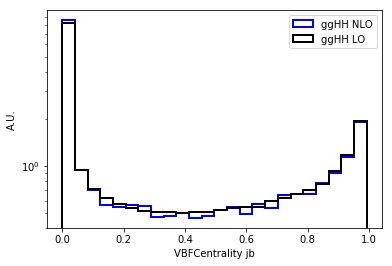

VBFDeltaR_jg


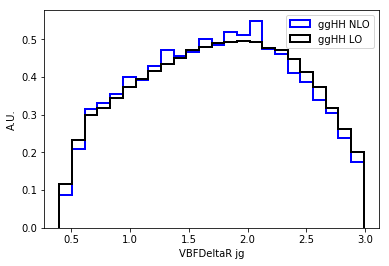

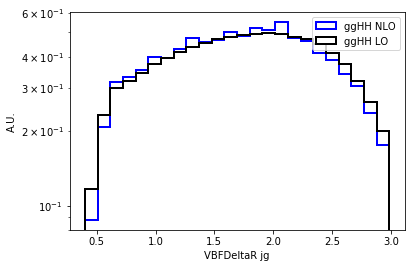

VBFDeltaR_jb


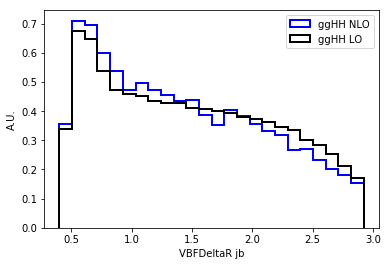

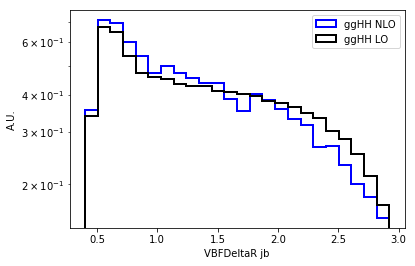

VBFProd_eta


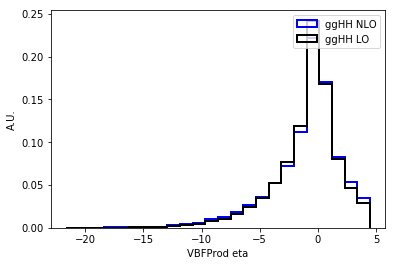

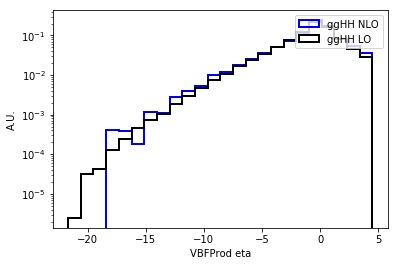

VBFJet_mjj


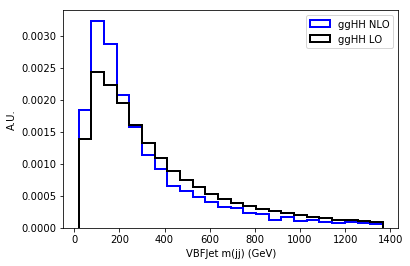

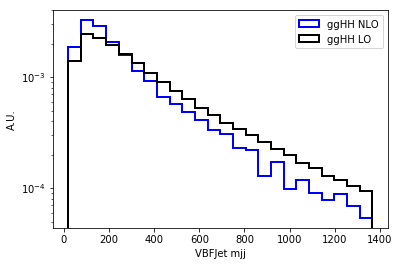

VBFJet_Delta_eta


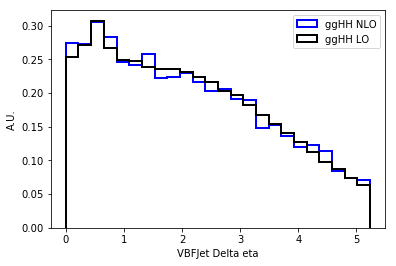

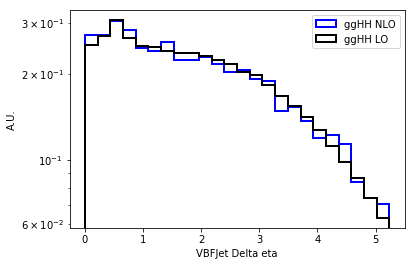

VBFleadJet_QGL


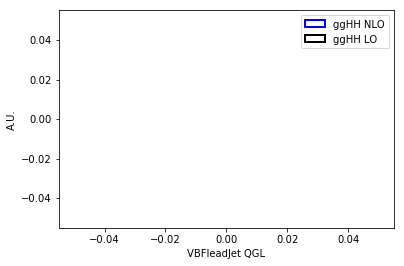

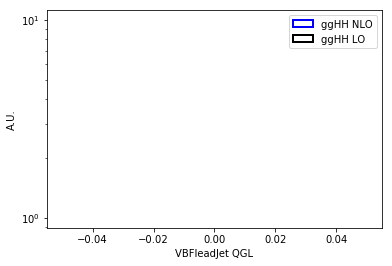

VBFsubleadJet_QGL


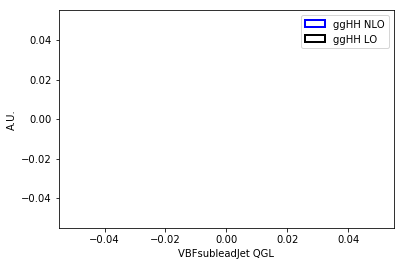

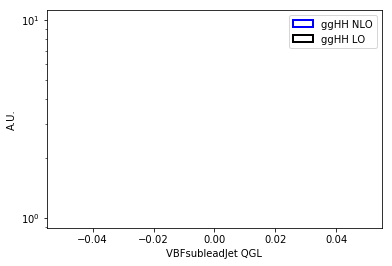

diHiggs_pt


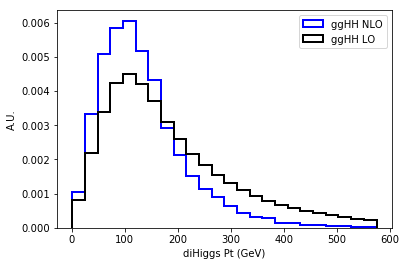

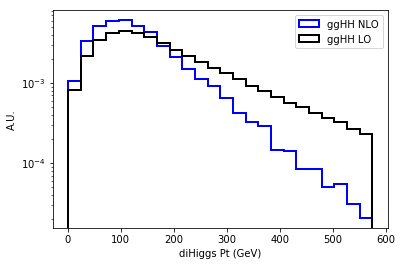

MX


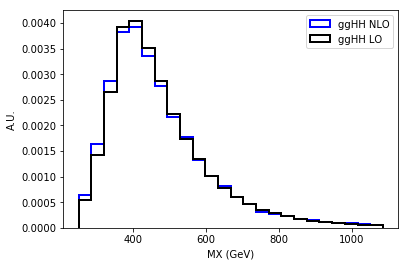

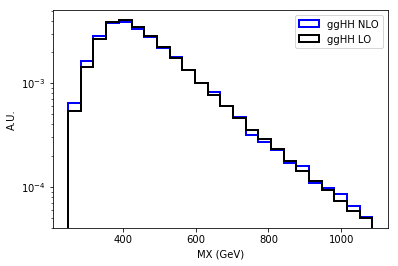

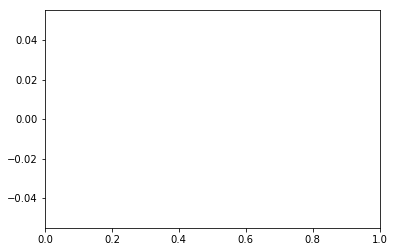

In [33]:
#plotting routine
numbins=25
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for feat in features:
    if 'weight' in feat: 
        continue
    if 'MVAOutputTransformed' in feat: 
        continue
    print feat 
    feat=feat.replace('noexpand:','')
    #set the same range
    nbins = np.linspace(min(df_ggHH_LO[feat]), np.quantile(df_ggHH_LO[feat],0.95) , numbins)
     
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO[feat],label='ggHH NLO',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_LO[feat],label='ggHH LO',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_LO['weight']*df_ggHH_LO['benchmark_reweight_SM'],linewidth=2.0)
    plt.legend(loc="upper right")
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)').replace('mjj','m(jj) (GeV)'))
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+".png"))
    plt.show()
    
    plt.yscale('log')
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO[feat],label='ggHH NLO',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_LO[feat],label='ggHH LO',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_LO['weight']*df_ggHH_LO['benchmark_reweight_SM'],linewidth=2.0)
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)'))
    plt.legend(loc="upper right")
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+"_log.png"))


    plt.show()
    plt.yscale('linear')


## Test of new VBF HH sample : new VBF HH 2016 vs old 2018 

In [41]:
year='2018'


indir = '/work/nchernya/HHbbgg_ETH_devel/root_files/new_vbfhh_samples/'
indir2='/work/nchernya/HHbbgg_ETH_devel/root_files/gghh_2jets/'

file_ggHH_NLO_2018 = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_Era2018_RR-17Sep2018_v2.root'
file_ggHH_NLO_2016 = 'output_VBFHHTo2B2G_CV_1_C2V_1_C3_1_dipoleRecoilOff-TuneCUETP8M1_PSweights_13TeV-madgraph-pythia8.root'

process_ggHH_NLO_2018 = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV_madgraph_pythia8_13TeV_VBFDoubleHTag_0'
process_ggHH_NLO_2016 = 'vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0'


features = 'HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,noexpand:(leadingPhoton_pt/CMS_hgg_mass),noexpand:(subleadingPhoton_pt/CMS_hgg_mass),noexpand:(leadingJet_pt/Mjj),noexpand:(subleadingJet_pt/Mjj),rho,noexpand:(leadingJet_bRegNNResolution*1.4826),noexpand:(subleadingJet_bRegNNResolution*1.4826),noexpand:(sigmaMJets*1.4826),PhoJetMinDr,PhoJetOtherDr,noexpand:(VBFleadJet_pt/VBFJet_mjj),VBFleadJet_eta,noexpand:(VBFsubleadJet_pt/VBFJet_mjj),VBFsubleadJet_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFProd_eta,VBFJet_mjj,VBFJet_Delta_eta,VBFleadJet_QGL,VBFsubleadJet_QGL,diHiggs_pt,MX'.split(",")
out_dir = indir+'plots_VBFHH_new_2016_old2018/'

df_ggHH_NLO_2016 = load_data_rpd(indir+file_ggHH_NLO_2016, features, process_ggHH_NLO_2016,'tagsDumper/trees/','MX>0') 
df_ggHH_NLO_2018 = load_data_rpd(indir2+file_ggHH_NLO_2018, features, process_ggHH_NLO_2018,'tagsDumper/trees/','MX>0') 


Entries in ntuple:
518297
Entries in ntuple:
55998


HHbbggMVA


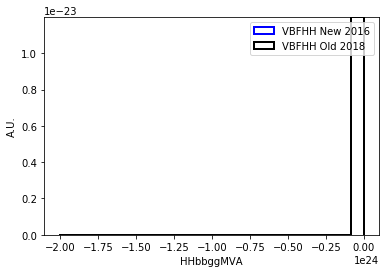

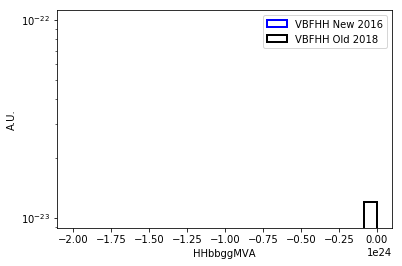

leadingJet_DeepFlavour


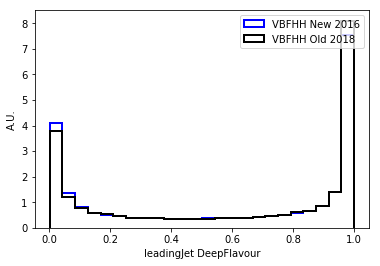

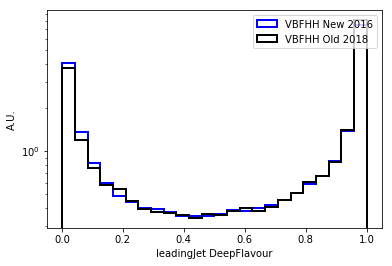

subleadingJet_DeepFlavour


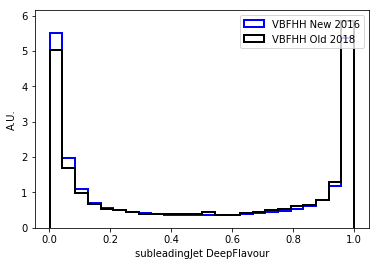

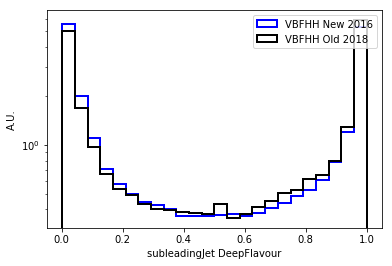

absCosThetaStar_CS


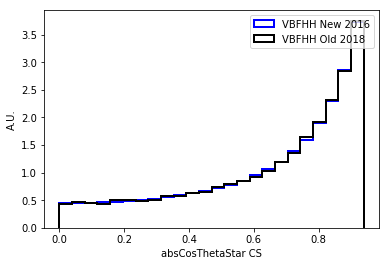

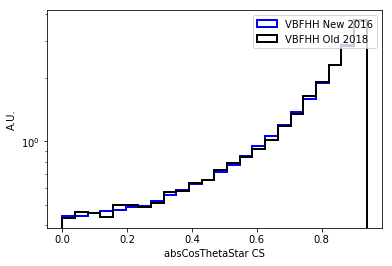

absCosTheta_bb


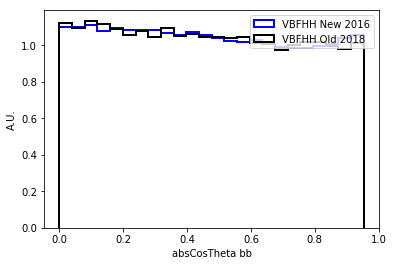

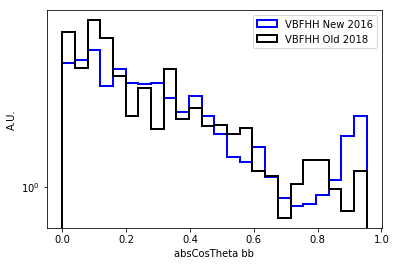

absCosTheta_gg


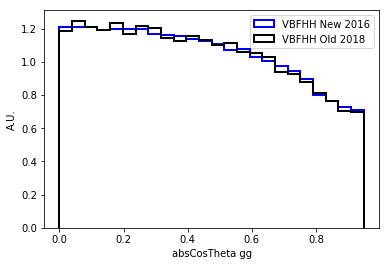

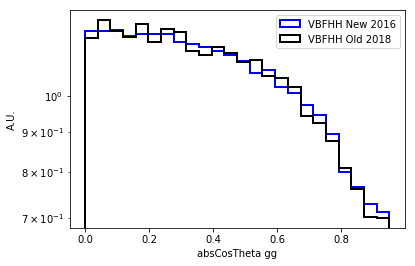

diphotonCandidatePtOverdiHiggsM


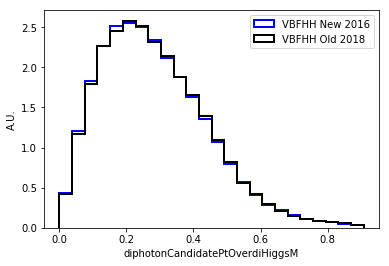

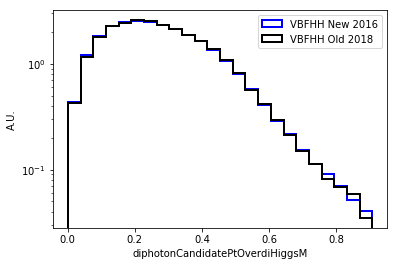

dijetCandidatePtOverdiHiggsM


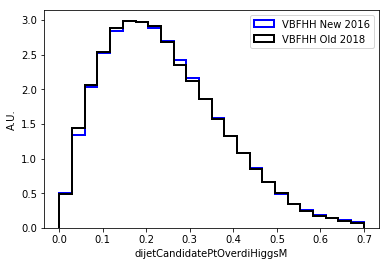

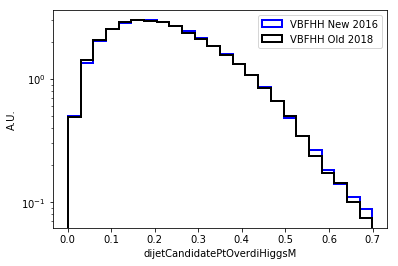

customLeadingPhotonIDMVA


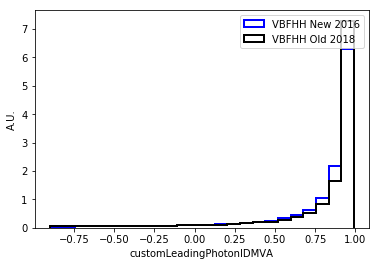

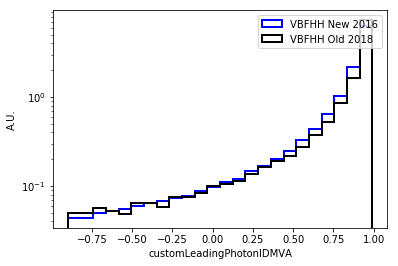

customSubLeadingPhotonIDMVA


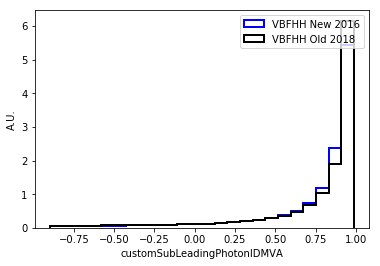

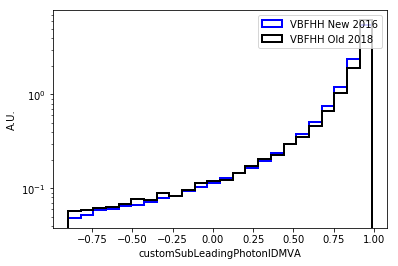

leadingPhotonSigOverE


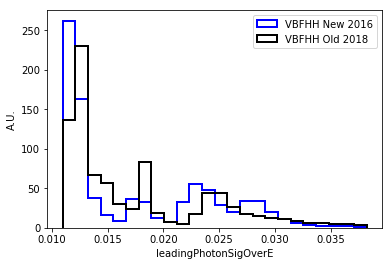

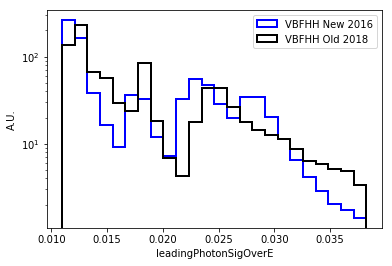

subleadingPhotonSigOverE


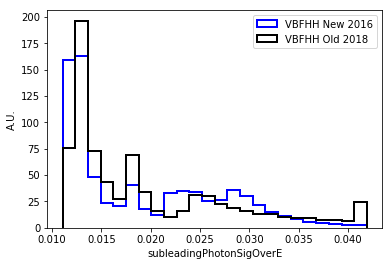

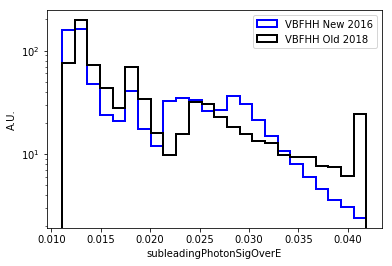

sigmaMOverM


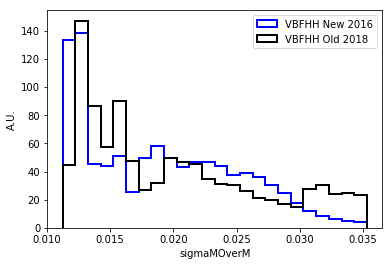

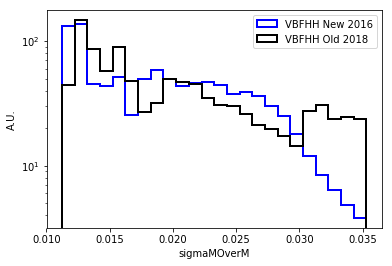

noexpand:(leadingPhoton_pt/CMS_hgg_mass)


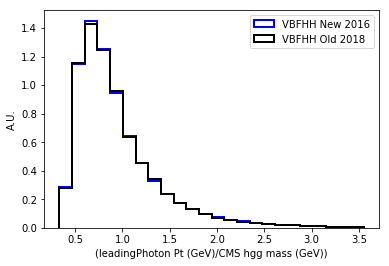

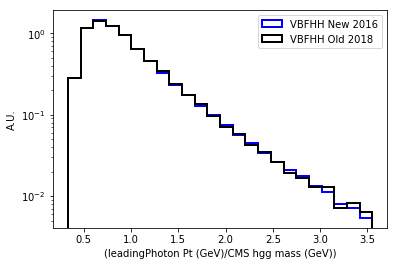

noexpand:(subleadingPhoton_pt/CMS_hgg_mass)


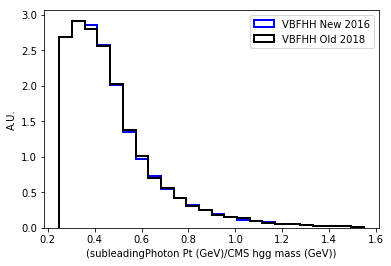

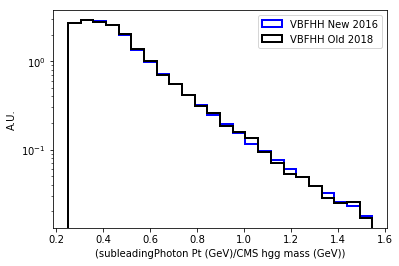

noexpand:(leadingJet_pt/Mjj)


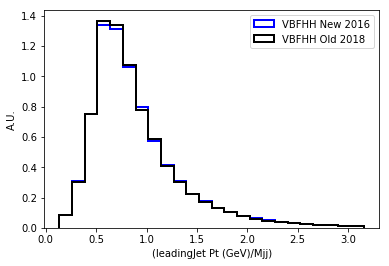

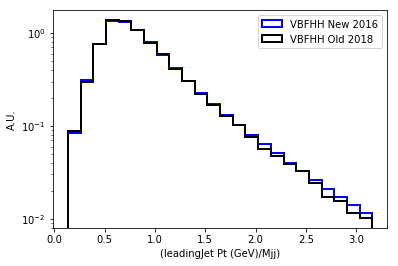

noexpand:(subleadingJet_pt/Mjj)


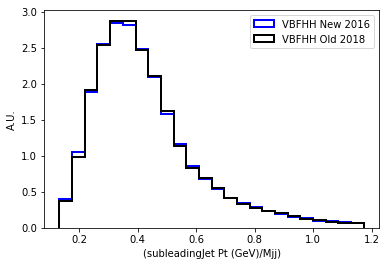

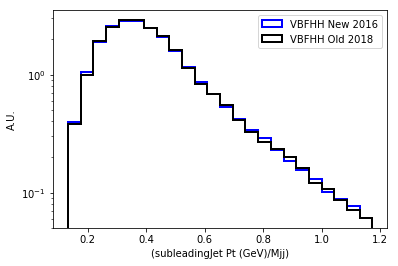

rho


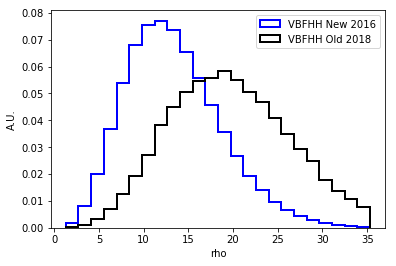

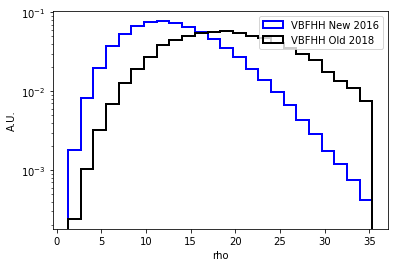

noexpand:(leadingJet_bRegNNResolution*1.4826)


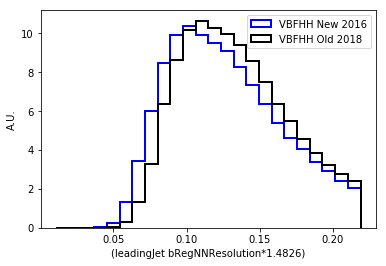

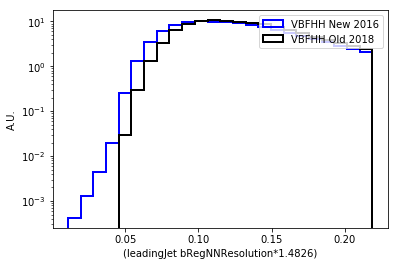

noexpand:(subleadingJet_bRegNNResolution*1.4826)


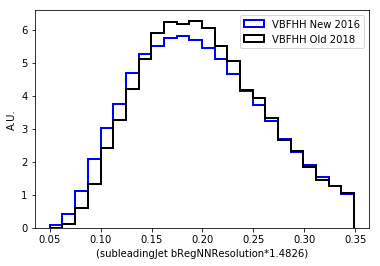

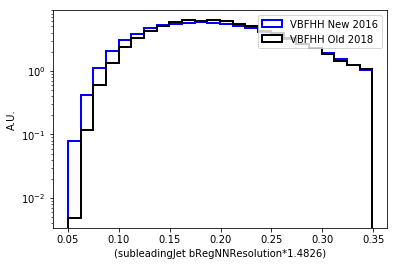

noexpand:(sigmaMJets*1.4826)


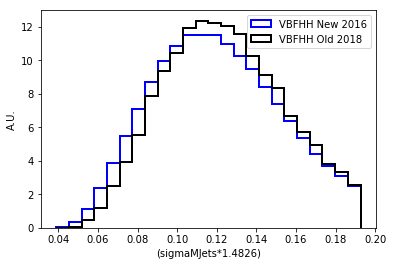

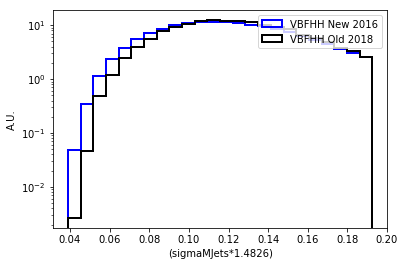

PhoJetMinDr


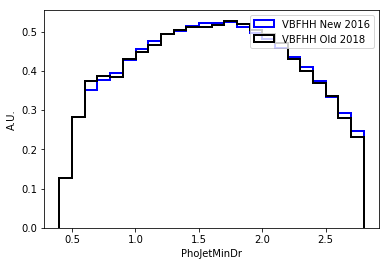

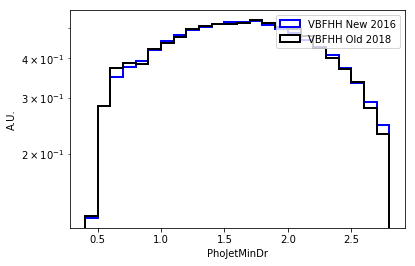

PhoJetOtherDr


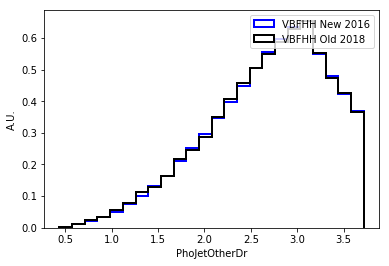

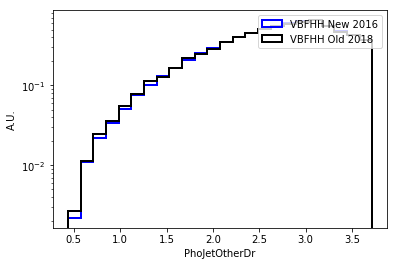

noexpand:(VBFleadJet_pt/VBFJet_mjj)


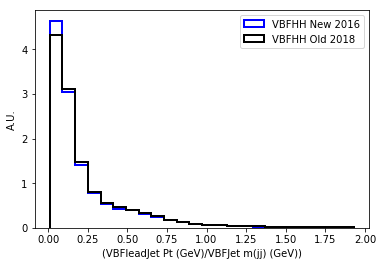

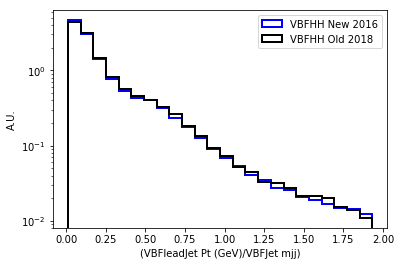

VBFleadJet_eta


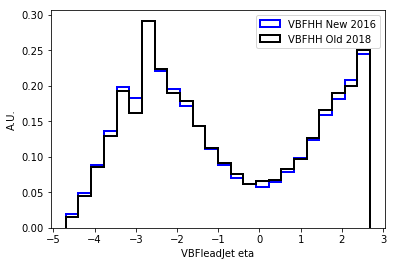

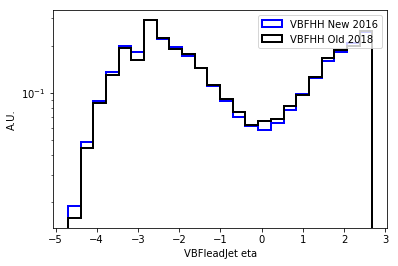

noexpand:(VBFsubleadJet_pt/VBFJet_mjj)


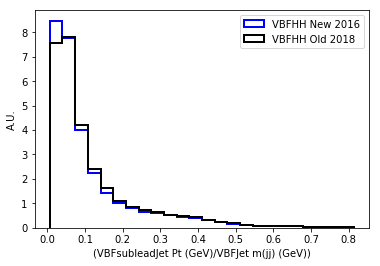

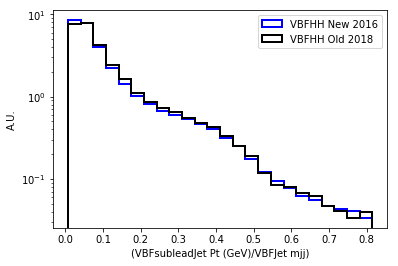

VBFsubleadJet_eta


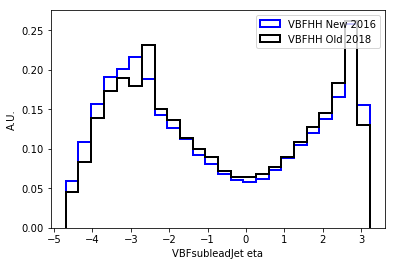

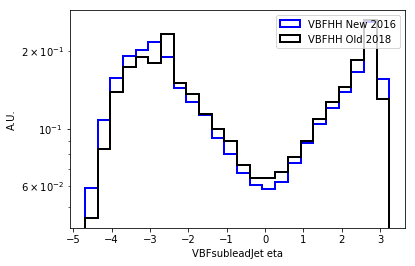

VBFCentrality_jg


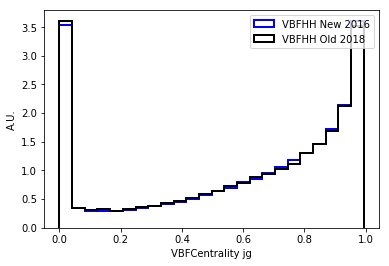

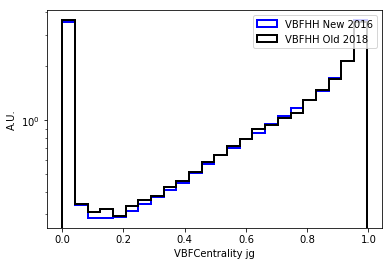

VBFCentrality_jb


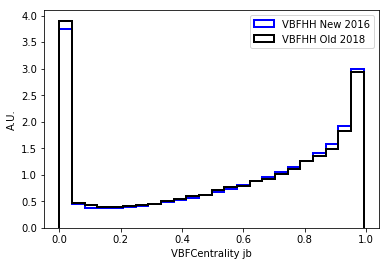

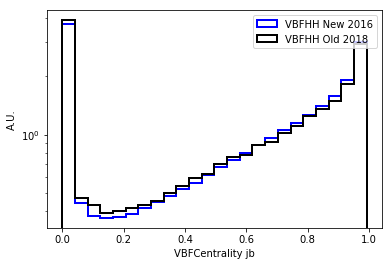

VBFDeltaR_jg


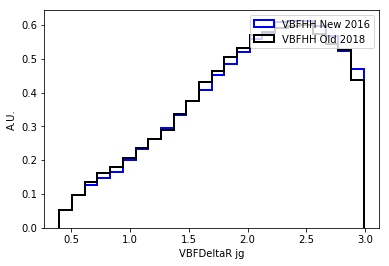

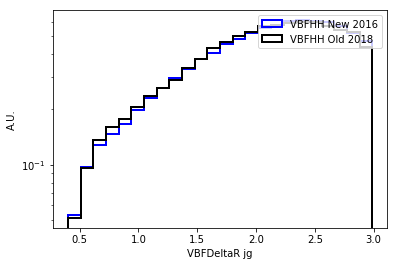

VBFDeltaR_jb


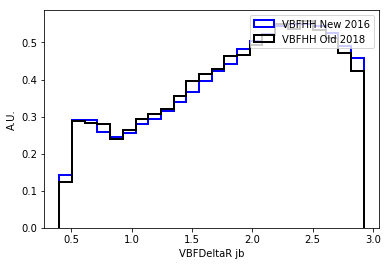

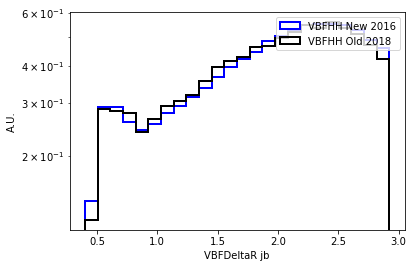

VBFProd_eta


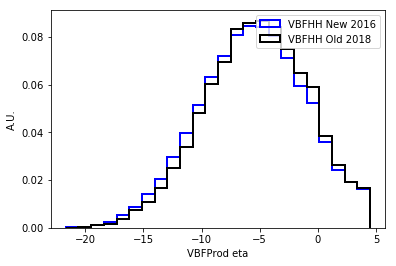

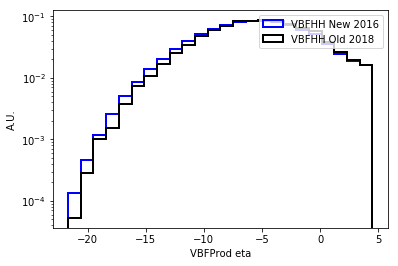

VBFJet_mjj


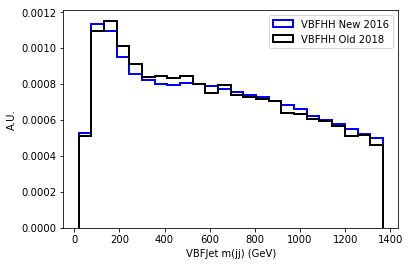

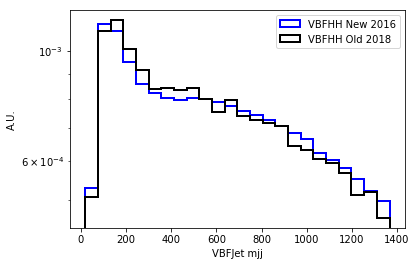

VBFJet_Delta_eta


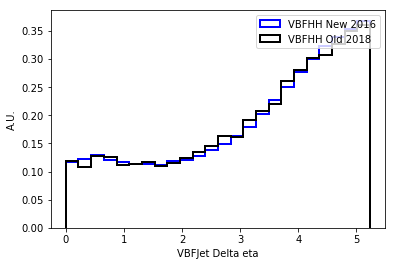

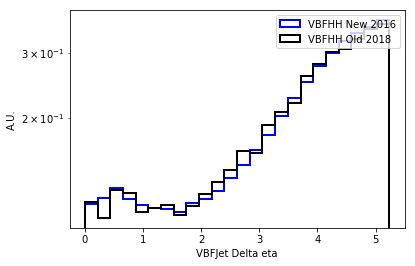

VBFleadJet_QGL


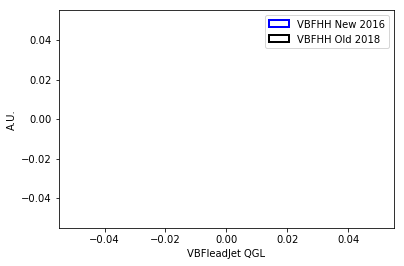

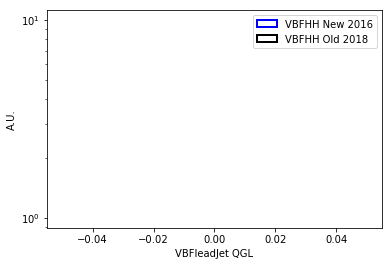

VBFsubleadJet_QGL


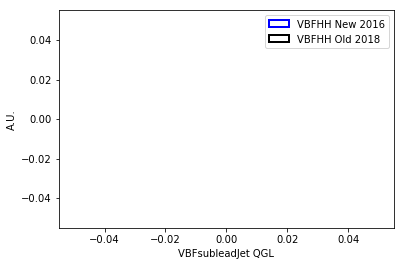

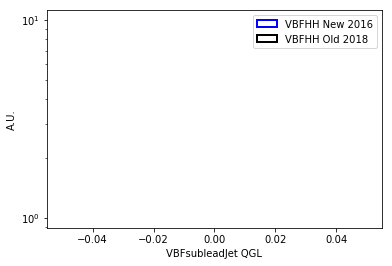

diHiggs_pt


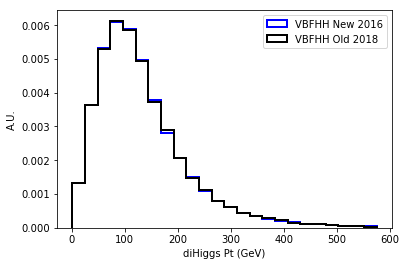

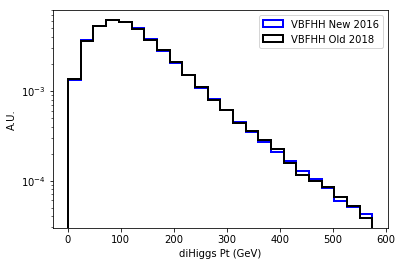

MX


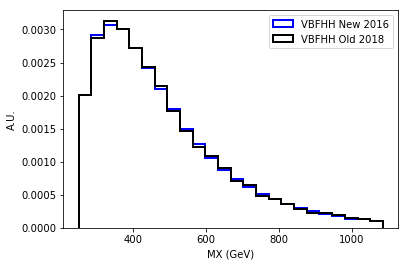

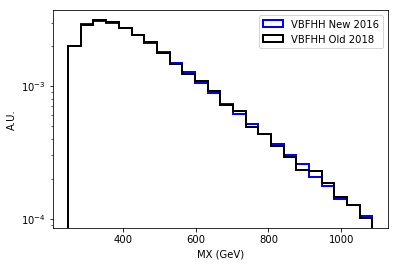

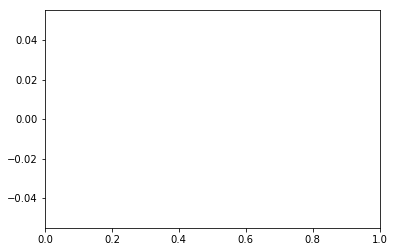

In [62]:
#plotting routine
numbins=25
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for feat in features:
    if 'weight' in feat: 
        continue
    if 'MVAOutputTransformed' in feat: 
        continue
    print feat 
    feat=feat.replace('noexpand:','')
    #set the same range
    nbins = np.linspace(min(df_ggHH_LO[feat]), np.quantile(df_ggHH_LO[feat],0.95) , numbins)
     
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO_2016[feat],label='VBFHH New 2016',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO_2016['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_NLO_2018[feat],label='VBFHH Old 2018',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_NLO_2018['weight'],linewidth=2.0)
    plt.legend(loc="upper right")
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)').replace('mjj','m(jj) (GeV)'))
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+".png"))
    plt.show()
    
    plt.yscale('log')
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO_2016[feat],label='VBFHH New 2016',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO_2016['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_NLO_2018[feat],label='VBFHH Old 2018',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_NLO_2018['weight'],linewidth=2.0)
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)'))
    plt.legend(loc="upper right")
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+"_log.png"))


    plt.show()
    plt.yscale('linear')


In [46]:
plt.hist(df_ggHH_NLO_2016['VBFleadJet_QGL'],df_ggHH_NLO_2016['weight'])

SyntaxError: non-keyword arg after keyword arg (<ipython-input-46-676a889bd86c>, line 1)

In [66]:
sum(df_ggHH_NLO_2016['VBFleadJet_QGL'])

nan

In [59]:
def check_for_nan(df,branch_name='event'):
    print df.isnull().sum()
    index = df[branch_name].index[df[branch_name].apply(np.isnan)]
    print 'event numbers for nan events : ', df['weight'][index]
    new_df = df.drop(df.index[index])
    return new_df


    
def drop_from_df(df,index):
    return df.drop(df.index[index])

def drop_nan(df):
    return df.dropna()

def clean_nan(df):
    df = df.dropna()
    return 

In [61]:
df_ggHH_NLO_2018 = drop_nan(df_ggHH_NLO_2018)
clean_nan(df_ggHH_NLO_2016)

In [67]:
sum(df_ggHH_NLO_2016['VBFsubleadJet_QGL'])

nan

In [68]:
check_for_nan(df_ggHH_NLO_2016,'VBFsubleadJet_QGL')

HHbbggMVA                                   0
weight                                      0
leadingJet_DeepFlavour                      0
subleadingJet_DeepFlavour                   0
absCosThetaStar_CS                          0
absCosTheta_bb                              0
absCosTheta_gg                              0
diphotonCandidatePtOverdiHiggsM             0
dijetCandidatePtOverdiHiggsM                0
customLeadingPhotonIDMVA                    0
customSubLeadingPhotonIDMVA                 0
leadingPhotonSigOverE                       0
subleadingPhotonSigOverE                    0
sigmaMOverM                                 0
rho                                         0
PhoJetMinDr                                 0
PhoJetOtherDr                               0
VBFleadJet_eta                              0
VBFsubleadJet_eta                           0
VBFCentrality_jg                            0
VBFCentrality_jb                            0
VBFDeltaR_jg                      

,HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,...,MX,(leadingPhoton_pt/CMS_hgg_mass),(subleadingPhoton_pt/CMS_hgg_mass),(leadingJet_pt/Mjj),(subleadingJet_pt/Mjj),(leadingJet_bRegNNResolution*1.4826),(subleadingJet_bRegNNResolution*1.4826),(sigmaMJets*1.4826),(VBFleadJet_pt/VBFJet_mjj),(VBFsubleadJet_pt/VBFJet_mjj)
0,-0.001297,2.931193e-07,0.970516,0.846082,0.692494,0.736281,0.730587,0.256508,0.460551,0.898834,...,380.181091,0.498662,0.476003,1.157900,0.408405,0.189137,0.169730,0.127237,0.078209,0.029697
1,0.022058,1.839730e-07,0.990787,0.023861,0.994653,0.131034,0.253144,0.059233,0.096894,-0.681347,...,795.785339,0.608132,0.451062,0.643219,0.648673,0.093634,0.204519,0.112487,0.736185,0.297931
2,0.290148,3.434076e-07,0.261892,0.015676,0.868615,0.075705,0.999133,0.347327,0.097262,0.516329,...,421.446625,0.568388,0.450989,0.628332,0.466739,0.271930,0.265364,0.189986,0.141247,0.054329
3,0.033656,2.723524e-07,0.689002,0.939514,0.981830,0.236064,0.289019,0.089895,0.182426,0.019974,...,590.988159,0.747132,0.338513,0.867606,0.447365,0.134858,0.183333,0.113442,0.784929,0.379642
4,-0.000475,3.280887e-07,0.438629,0.030426,0.976700,0.331308,0.859505,0.138320,0.028602,0.946091,...,379.514404,0.397776,0.259502,0.491920,0.434884,0.148050,0.135983,0.100515,0.070065,0.030887
5,-0.005706,2.160842e-07,0.989225,0.086664,0.998603,0.093114,0.776774,0.125215,0.085007,0.789089,...,986.910828,0.840161,0.389800,0.832073,0.289472,0.131069,0.357953,0.189250,0.749876,0.225042
6,0.019610,2.587769e-07,0.993320,0.998002,0.852688,0.438582,0.484589,0.204845,0.295561,0.808244,...,447.333954,0.623587,0.527237,0.874318,0.422768,0.100232,0.164349,0.096034,0.048938,0.047655
7,0.237644,1.165795e-08,0.986313,0.985032,0.933929,0.651145,0.342456,0.157264,0.282970,-0.064844,...,530.115479,0.869533,0.319534,1.146948,0.383694,0.103501,0.172947,0.099644,0.073759,0.061173
8,0.007847,3.136743e-07,0.981489,0.036018,0.236093,0.488790,0.498449,0.289062,0.831919,0.180408,...,571.582031,0.741355,0.705876,4.495877,0.296144,0.108691,0.289249,0.126485,0.222694,0.100004
9,-0.005936,3.059984e-07,0.877699,0.023217,0.752574,0.871092,0.580321,0.382619,0.187086,0.945218,...,343.685852,0.678743,0.513888,0.528583,0.339897,0.339435,0.229578,0.205122,0.121714,0.049264


In [69]:
test = drop_nan(df_ggHH_NLO_2016)

In [70]:
check_for_nan(test,'VBFsubleadJet_QGL')

HHbbggMVA                                  0
weight                                     0
leadingJet_DeepFlavour                     0
subleadingJet_DeepFlavour                  0
absCosThetaStar_CS                         0
absCosTheta_bb                             0
absCosTheta_gg                             0
diphotonCandidatePtOverdiHiggsM            0
dijetCandidatePtOverdiHiggsM               0
customLeadingPhotonIDMVA                   0
customSubLeadingPhotonIDMVA                0
leadingPhotonSigOverE                      0
subleadingPhotonSigOverE                   0
sigmaMOverM                                0
rho                                        0
PhoJetMinDr                                0
PhoJetOtherDr                              0
VBFleadJet_eta                             0
VBFsubleadJet_eta                          0
VBFCentrality_jg                           0
VBFCentrality_jb                           0
VBFDeltaR_jg                               0
VBFDeltaR_

,HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,...,MX,(leadingPhoton_pt/CMS_hgg_mass),(subleadingPhoton_pt/CMS_hgg_mass),(leadingJet_pt/Mjj),(subleadingJet_pt/Mjj),(leadingJet_bRegNNResolution*1.4826),(subleadingJet_bRegNNResolution*1.4826),(sigmaMJets*1.4826),(VBFleadJet_pt/VBFJet_mjj),(VBFsubleadJet_pt/VBFJet_mjj)
0,-0.001297,2.931193e-07,0.970516,0.846082,0.692494,0.736281,0.730587,0.256508,0.460551,0.898834,...,380.181091,0.498662,0.476003,1.157900,0.408405,0.189137,0.169730,0.127237,0.078209,0.029697
1,0.022058,1.839730e-07,0.990787,0.023861,0.994653,0.131034,0.253144,0.059233,0.096894,-0.681347,...,795.785339,0.608132,0.451062,0.643219,0.648673,0.093634,0.204519,0.112487,0.736185,0.297931
2,0.290148,3.434076e-07,0.261892,0.015676,0.868615,0.075705,0.999133,0.347327,0.097262,0.516329,...,421.446625,0.568388,0.450989,0.628332,0.466739,0.271930,0.265364,0.189986,0.141247,0.054329
3,0.033656,2.723524e-07,0.689002,0.939514,0.981830,0.236064,0.289019,0.089895,0.182426,0.019974,...,590.988159,0.747132,0.338513,0.867606,0.447365,0.134858,0.183333,0.113442,0.784929,0.379642
4,-0.000475,3.280887e-07,0.438629,0.030426,0.976700,0.331308,0.859505,0.138320,0.028602,0.946091,...,379.514404,0.397776,0.259502,0.491920,0.434884,0.148050,0.135983,0.100515,0.070065,0.030887
5,-0.005706,2.160842e-07,0.989225,0.086664,0.998603,0.093114,0.776774,0.125215,0.085007,0.789089,...,986.910828,0.840161,0.389800,0.832073,0.289472,0.131069,0.357953,0.189250,0.749876,0.225042
6,0.019610,2.587769e-07,0.993320,0.998002,0.852688,0.438582,0.484589,0.204845,0.295561,0.808244,...,447.333954,0.623587,0.527237,0.874318,0.422768,0.100232,0.164349,0.096034,0.048938,0.047655
7,0.237644,1.165795e-08,0.986313,0.985032,0.933929,0.651145,0.342456,0.157264,0.282970,-0.064844,...,530.115479,0.869533,0.319534,1.146948,0.383694,0.103501,0.172947,0.099644,0.073759,0.061173
8,0.007847,3.136743e-07,0.981489,0.036018,0.236093,0.488790,0.498449,0.289062,0.831919,0.180408,...,571.582031,0.741355,0.705876,4.495877,0.296144,0.108691,0.289249,0.126485,0.222694,0.100004
9,-0.005936,3.059984e-07,0.877699,0.023217,0.752574,0.871092,0.580321,0.382619,0.187086,0.945218,...,343.685852,0.678743,0.513888,0.528583,0.339897,0.339435,0.229578,0.205122,0.121714,0.049264


(array([  3257.,      0.,      0.,      0.,      0., 114665.,  74347.,
         74467.,  92268., 159260.]),
 array([-1.0000000e+00, -8.0000001e-01, -6.0000002e-01, -4.0000004e-01,
        -2.0000005e-01, -5.9604645e-08,  1.9999993e-01,  3.9999992e-01,
         5.9999990e-01,  7.9999989e-01,  9.9999988e-01], dtype=float32),
 <a list of 10 Patch objects>)

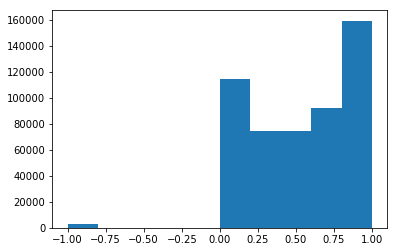

In [71]:
plt.hist(test['VBFsubleadJet_QGL'])

## ttHScore optimization

In [18]:
labels=[]
outstr = "30_04_2020_ttHScore_opt"
labels.append(outstr)
utils.IO.plotFolder = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/%s/'%outstr
if not os.path.exists(utils.IO.plotFolder):
    print utils.IO.plotFolder, "doesn't exist, creating it..."
    os.makedirs(utils.IO.plotFolder)

/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/30_04_2020_ttHScore_opt/ doesn't exist, creating it...


In [21]:
vbf_dataframe_list = []
kl_list = [1,-2.,8,1.]

year='2016'
year_dict = {}
year_dict['2016'] = 0

ntuples = '' 
couplings = 'CV_1_C2V_1_C3_1,CV_1_C2V_2_C3_1,CV_1_C2V_1_C3_2,CV_1_C2V_1_C3_0,CV_0_5_C2V_1_C3_1,CV_1_5_C2V_1_C3_1'.split(',') ### THE ORDER IS EXTREMELY IMPRORTANT, DO NOT CHANGE
signal = []
for coup in couplings :
    signal.append('output_VBFHHTo2B2G_%s_dipoleRecoilOff-TuneCUETP8M1_PSweights_13TeV-madgraph-pythia8.root'%coup)
signal_name = 'vbfhh%s_13TeV_125_13TeV_VBFDoubleHTag_0'%year

for ikl,kl in enumerate(kl_list) :
    import training_utils as utils
    reload(utils)
    utils.IO.ldata = '/work/nchernya/HHbbgg_ETH_devel/root_files/new_vbfhh_samples/'
    utils.IO.reweightVBFHH = True
    utils.IO.vbfhh_cv = [1.]  
    utils.IO.vbfhh_c2v = [1.]
    if ikl==len(kl_list)-1 : utils.IO.vbfhh_c2v = [0.]
    utils.IO.vbfhh_kl = [kl]
    for sig in signal:
        utils.IO.add_signal(ntuples,sig,1,'tagsDumper/trees/%s'%signal_name,year_dict[year])
    cuts='MX>0'
    preprocessing.set_signals(features,True,cuts)
    vbf_dataframe_list.append(copy.deepcopy(utils.IO.signal_df[0]))


using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumpe

In [7]:
year='2018'


indir='/work/nchernya/HHbbgg_ETH_devel/root_files/vbfhh_preselection_wo_ttHkiller/'
indir2='/work/nchernya/HHbbgg_ETH_devel/root_files/gghh_2jets/'

file_VBFHH = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_Era2018_RR-17Sep2018_v2.root'
file_ggHH_LO = 'GluGluToHHTo2B2G_Era2018_RR-17Sep2018_v2.root'
file_ggHH_NLO = 'output_hh_nlo_kl_1_kt_1.root'
file_diphoton = 'output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root'
file_tth = 'output_tth_2018.root'


process_VBFHH = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV_madgraph_pythia8_13TeV_VBFDoubleHTag_0'
process_ggHH_LO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_ggHH_NLO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_tth = 'tth2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_diphoton = 'DiPhotonJetsBox_MGG_80toInf_13TeV_Sherpa_13TeV_VBFDoubleHTag_0'


features='weight,ttHScore,CMS_hgg_mass,MX'.split(',')
out_dir = indir+'plots_ttHScore/'

df_VBFHH = load_data_rpd(indir2+file_VBFHH, features, process_VBFHH,'tagsDumper/trees/','MX>0') 
df_ggHH_LO = load_data_rpd(indir2+file_ggHH_LO, features+['benchmark_reweight_SM'], process_ggHH_LO,'tagsDumper/trees/','MX>0') 
df_ggHH_NLO = load_data_rpd(indir+file_ggHH_NLO, features+['genweight'], process_ggHH_NLO,'tagsDumper/trees/','(genweight<0.1)')
df_diphoton = load_data_rpd(indir+file_diphoton, features, process_diphoton,'tagsDumper/trees/','MX>0') 
df_tth = load_data_rpd(indir+file_tth, features, process_tth,'tagsDumper/trees/','MX>0') 


###########################




Entries in ntuple:
55998
Entries in ntuple:
482573
Entries in ntuple:
17219
Entries in ntuple:
102888
Entries in ntuple:
98878


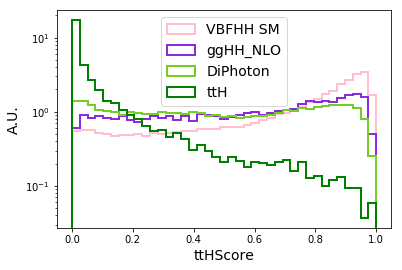

In [26]:
plt.yscale('log')
n, bins, patches = plt.hist(df_VBFHH['ttHScore'],color='pink', bins=np.linspace(0,1,40),weights=df_VBFHH['weight'], alpha=1.,normed=1,label='VBFHH SM',histtype='step',linewidth=2)
#_,_,_ = plt.hist(df_ggHH_LO['ttHScore'],color='violet', bins=bins,weights=df_ggHH_LO['weight']*df_ggHH_LO['benchmark_reweight_SM'], alpha=1.,normed=1,label='ggHH_LO',histtype='step')
_,_,_ = plt.hist(df_ggHH_NLO['ttHScore'],color='#8A2BE2', bins=bins,weights=df_ggHH_NLO['weight'], alpha=1.,normed=1,label='ggHH_NLO',histtype='step',linewidth=2)
_,_,_ = plt.hist(df_diphoton['ttHScore'],color='#76cd26', bins=bins,weights=df_diphoton['weight'], alpha=1.,normed=1,label='DiPhoton',histtype='step',linewidth=2)
_,_,_ = plt.hist(df_tth['ttHScore'],color='g', bins=bins,weights=df_tth['weight'], alpha=1.,normed=1,label='ttH',histtype='step',linewidth=2)

plt.xlabel('ttHScore', fontsize=14)
plt.ylabel('A.U.', fontsize=14)
plt.legend(loc = 'upper center', fontsize=14)
plt.savefig(utils.IO.plotFolder+"ttH_SMVBFHH.png")
plt.show()

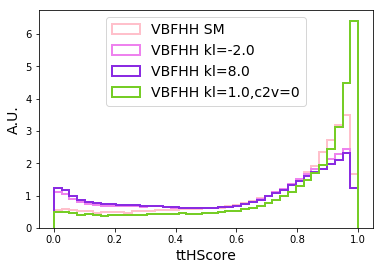

In [24]:
#plt.yscale('log')
colors = 'pink,violet,#8A2BE2,#76cd26,blue'.split(',')
n, bins, patches = plt.hist(df_VBFHH['ttHScore'],color='pink', bins=np.linspace(0,1,40),weights=df_VBFHH['weight'], alpha=1.,normed=1,label='VBFHH SM',histtype='step',linewidth=2)
for i in range(1,len(vbf_dataframe_list)):
    label='kl=%.1f'%kl_list[i]
    if i==len(kl_list)-1 : label='kl=%.1f,c2v=0'%kl_list[i]
    _,_,_ = plt.hist(vbf_dataframe_list[i]['ttHScore'],color=colors[i], bins=bins,weights=vbf_dataframe_list[i]['weight'], alpha=1.,normed=1,label='VBFHH '+label,histtype='step',linewidth=2)


plt.xlabel('ttHScore', fontsize=14)
plt.ylabel('A.U.', fontsize=14)
plt.legend(loc = 'upper center', fontsize=14)
plt.savefig(utils.IO.plotFolder+"ttH_VBFHH_kl.png")
plt.show()

In [64]:
yields_vbfHH = []
yields_vbfHH_kl = dict()
yields_ggHH = []
yields_bkg_fullmass = []
yields_bkg = []
yields_singleH = []
mgg_cut = '(CMS_hgg_mass>115)&(CMS_hgg_mass<135)'
for i in range(0,len(vbf_dataframe_list)):
    yields_vbfHH_kl[i] = []
for cut in np.linspace(0., 1.0, 200):
    yields_vbfHH.append(sum(df_VBFHH.query(mgg_cut+'&(ttHScore>%s)'%cut)['weight']))
    yields_ggHH.append(sum(df_ggHH_NLO.query(mgg_cut+'&(ttHScore>%s)'%cut)['weight'])) 
    yields_bkg_fullmass.append(sum(df_diphoton.query('(ttHScore>%s)'%cut)['weight'])) 
    yields_bkg.append(sum(df_diphoton.query(mgg_cut+'&(ttHScore>%s)'%cut)['weight'])) 
    yields_singleH.append(sum(df_tth.query(mgg_cut+'&(ttHScore>%s)'%cut)['weight'])) 
    for i in range(0,len(vbf_dataframe_list)):
        yields_vbfHH_kl[i].append(sum(vbf_dataframe_list[i].query(mgg_cut+'&(ttHScore>%s)'%cut)['weight']))

In [65]:
sign = []
power = []
sign_kl = dict()
for ikl in range(0,len(vbf_dataframe_list)):
    sign_kl[ikl] = []
for i in range(len(yields_vbfHH)):
    #if (yields_bkg_fullmass[i]>=6) : sign.append(yields_vbfHH[i]/np.sqrt(yields_singleH[i]+yields_bkg[i])) 
    #else : sign.append(0.)
    #sign.append(yields_vbfHH[i]/np.sqrt(yields_singleH[i])) 
    sign.append(yields_vbfHH[i]*100/np.sqrt(yields_singleH[i]+yields_bkg[i])) 
    power.append(yields_vbfHH[i]/np.sqrt(yields_singleH[i]+yields_bkg[i]+yields_vbfHH[i]))
    for ikl in range(0,len(vbf_dataframe_list)):
        sign_kl[ikl].append(yields_vbfHH_kl[ikl][i]*100/np.sqrt(yields_singleH[i]+yields_bkg[i])) 


/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


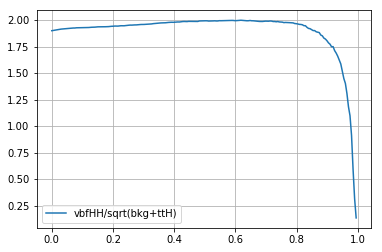

In [60]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(bkg+ttH)")
#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization.png")

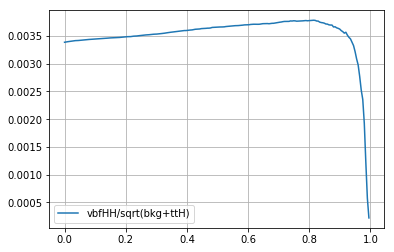

In [71]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign_kl[0], label="vbfHH/sqrt(bkg+ttH)")

#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization_kl.png")

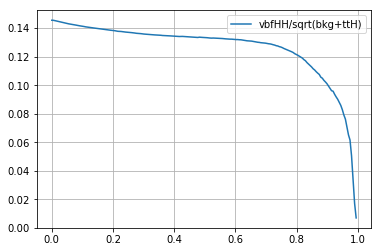

In [72]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign_kl[1], label="vbfHH/sqrt(bkg+ttH)")
#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization_kl.png")

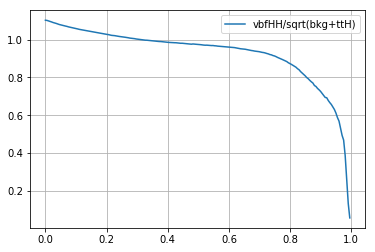

In [73]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign_kl[2], label="vbfHH/sqrt(bkg+ttH)")
#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization_kl.png")

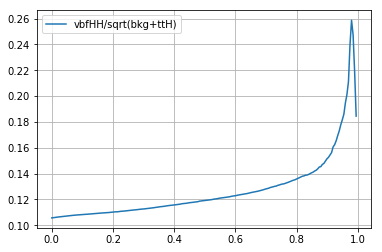

In [74]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign_kl[3], label="vbfHH/sqrt(bkg+ttH)")
#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization_kl.png")